# Snacky Clusters: YOLOv8
Software project for University of Pennsylvania BE 5370

Work done by Sabrina Weng


### Install YOLOv8 and Get the Dataset Ready for Training

- Dataset: Brain tumor MRI images downloaded from the open-source platform Roboflow. The dataset includes 414 train images, 50 valid images, and 10 test images. (https://universe.roboflow.com/yolo5objectdetection/tumor_detection-8pcck/dataset/1)

- Enviornment: The training is under the T4GPU environment in Google Colab.

In [ ]:
# install YOLOv8
!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.9/78.2 GB disk)


In [ ]:
# connect to Google Drive
import os
from google.colab import drive
if not os.path.ismount("/content/drive"):
  drive.mount('/content/drive')

# define Folder in Google Drive
gdrive_root = '/content/drive/MyDrive/demo_braintumor_yolov8'
if not os.path.isdir(gdrive_root):
  os.makedirs(gdrive_root)

Mounted at /content/drive


In [ ]:
# rewrite the config in the data.yaml with the correct file path
import yaml
config = {
    'train': '/content/drive/MyDrive/demo_braintumor_yolov8/dataset/train/images',
    'val': '/content/drive/MyDrive/demo_braintumor_yolov8/dataset/valid/images',
    'test': '/content/drive/MyDrive/demo_braintumor_yolov8/dataset/test/images',
    'nc': 2,
    'names': ['-', 'tumor'],
    'project': 'YOLOv8_braintumor',
}

with open(gdrive_root + '/dataset/data.yaml', 'w') as file:
  yaml.dump(config, file, default_flow_style = False)
with open(gdrive_root + '/dataset/data.yaml', 'r') as file:
  context = yaml.safe_load(file)
context

{'names': ['-', 'tumor'],
 'nc': 2,
 'project': 'YOLOv8_braintumor',
 'test': '/content/drive/MyDrive/demo_braintumor_yolov8/dataset/test/images',
 'train': '/content/drive/MyDrive/demo_braintumor_yolov8/dataset/train/images',
 'val': '/content/drive/MyDrive/demo_braintumor_yolov8/dataset/valid/images'}

We discover that there are 5 different YOLOv8 models for object detection: YOLOv8n (Nano), YOLOv8s (Small), YOLOv8m (Medium), YOLOv8l(Large), and YOLOv8x (Extra Large). In this project, we compared all 5 different YOLOv8 models using the dataset of brain tumor MRI images from Roboflow. All models underwent 30 epochs of training, and were compared using the same test image.

![Fig.1](https://drive.google.com/uc?id=1pI6a9UwzAgxM4ZF6oKNK5KNVoH9oNFDE)

Fig.1 Performance and Speed benchmarks of five YOLOv8 variants on the MS COCO dataset. (Image from: https://encord.com/blog/yolo-object-detection-guide/)

### Train (30 epochs) YOLOv8n Model & Evaluate the Model on Test Dataset

In [ ]:
model_type = 'v8n'

In [ ]:
# train model for 30 epochs
%cd {gdrive_root}/{model_type}
!yolo task=detect mode=train model=yolov8n.pt data={gdrive_root}/dataset/data.yaml epochs=30 plots=True

/content/drive/MyDrive/demo_braintumor_yolov8/v8n
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/content/drive/MyDrive/demo_braintumor_yolov8/dataset/data.yaml, epochs=30, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=

Under the YOLOv8n model training of 30 epochs, the model achieved an mAP (mean Average Precision) of 0.861 at 0.5 IoU for tumor detection, and the 30 epochs were completed in approximately 8.4 minutes (0.141 hours). We also visualized the results shown below.

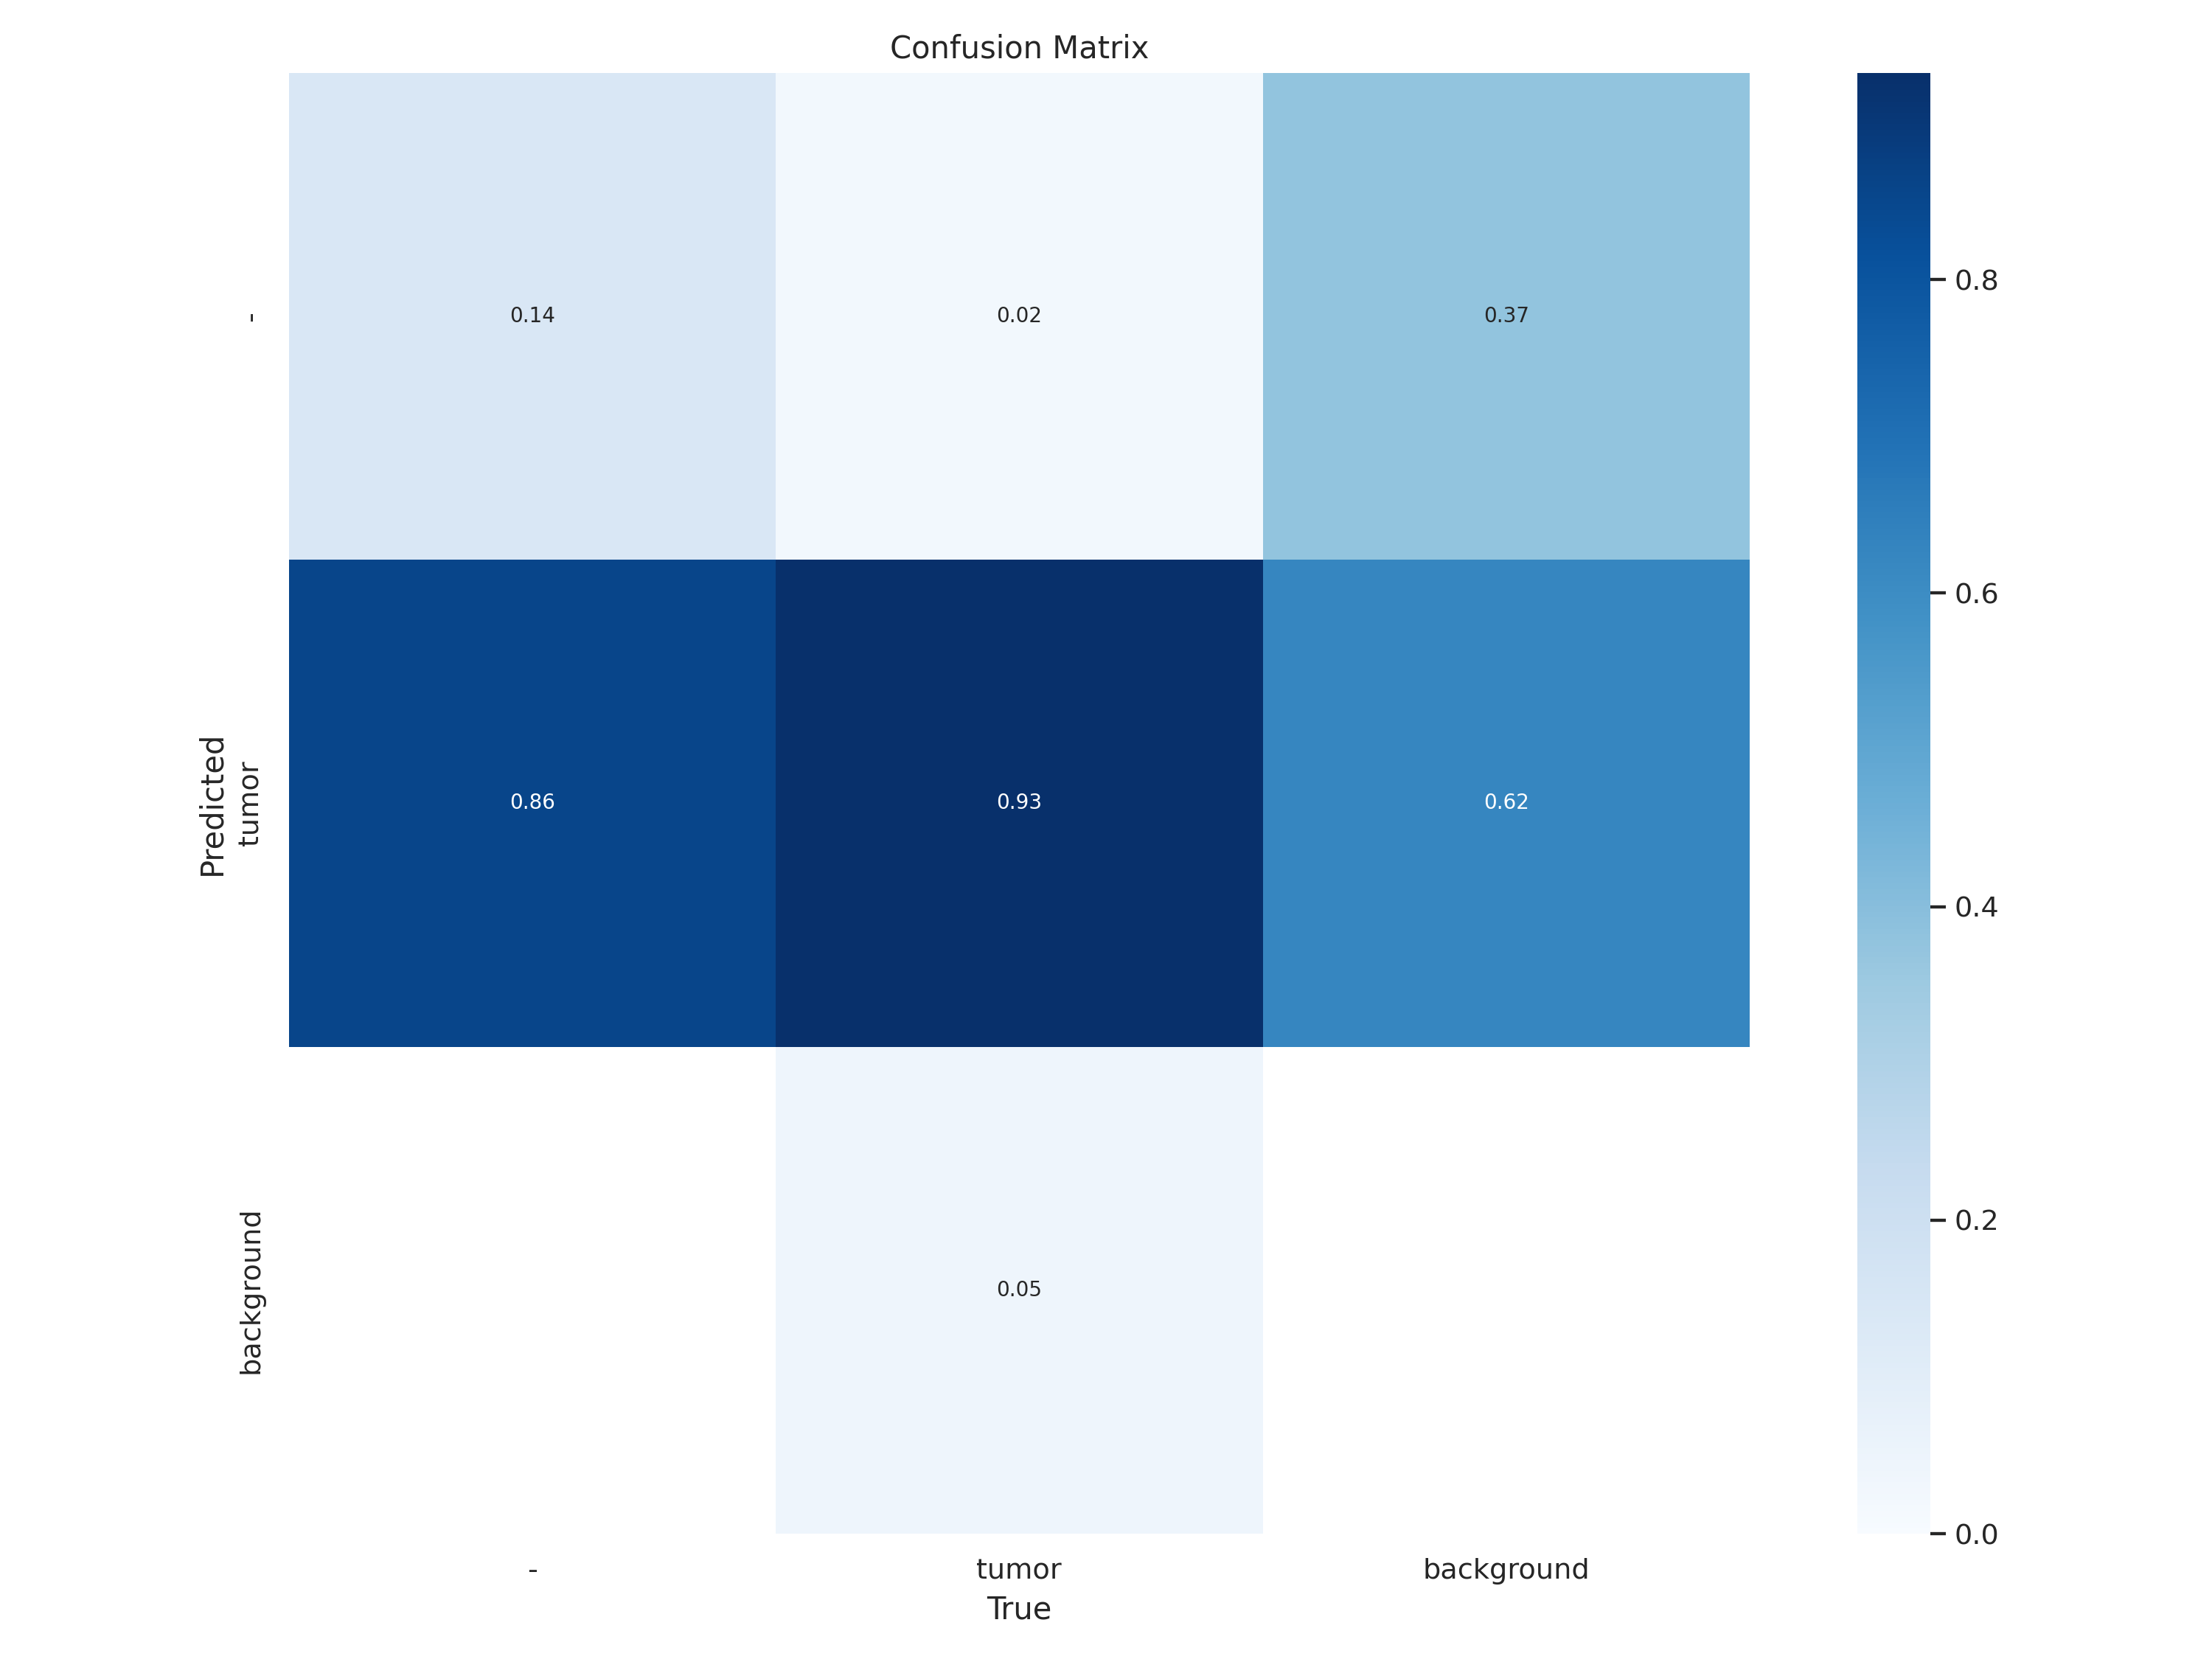

In [ ]:
# visulize the training results: confusion matrix
from IPython.display import display, Image
Image(filename=f'{gdrive_root}/{model_type}/runs/detect/train/confusion_matrix.png', width=600)

Fig.2 The confusion matrix for YOLOv8n model training result.

The figure showed that the prediction of the true tumor had a very competitive accuracy of 0.93.

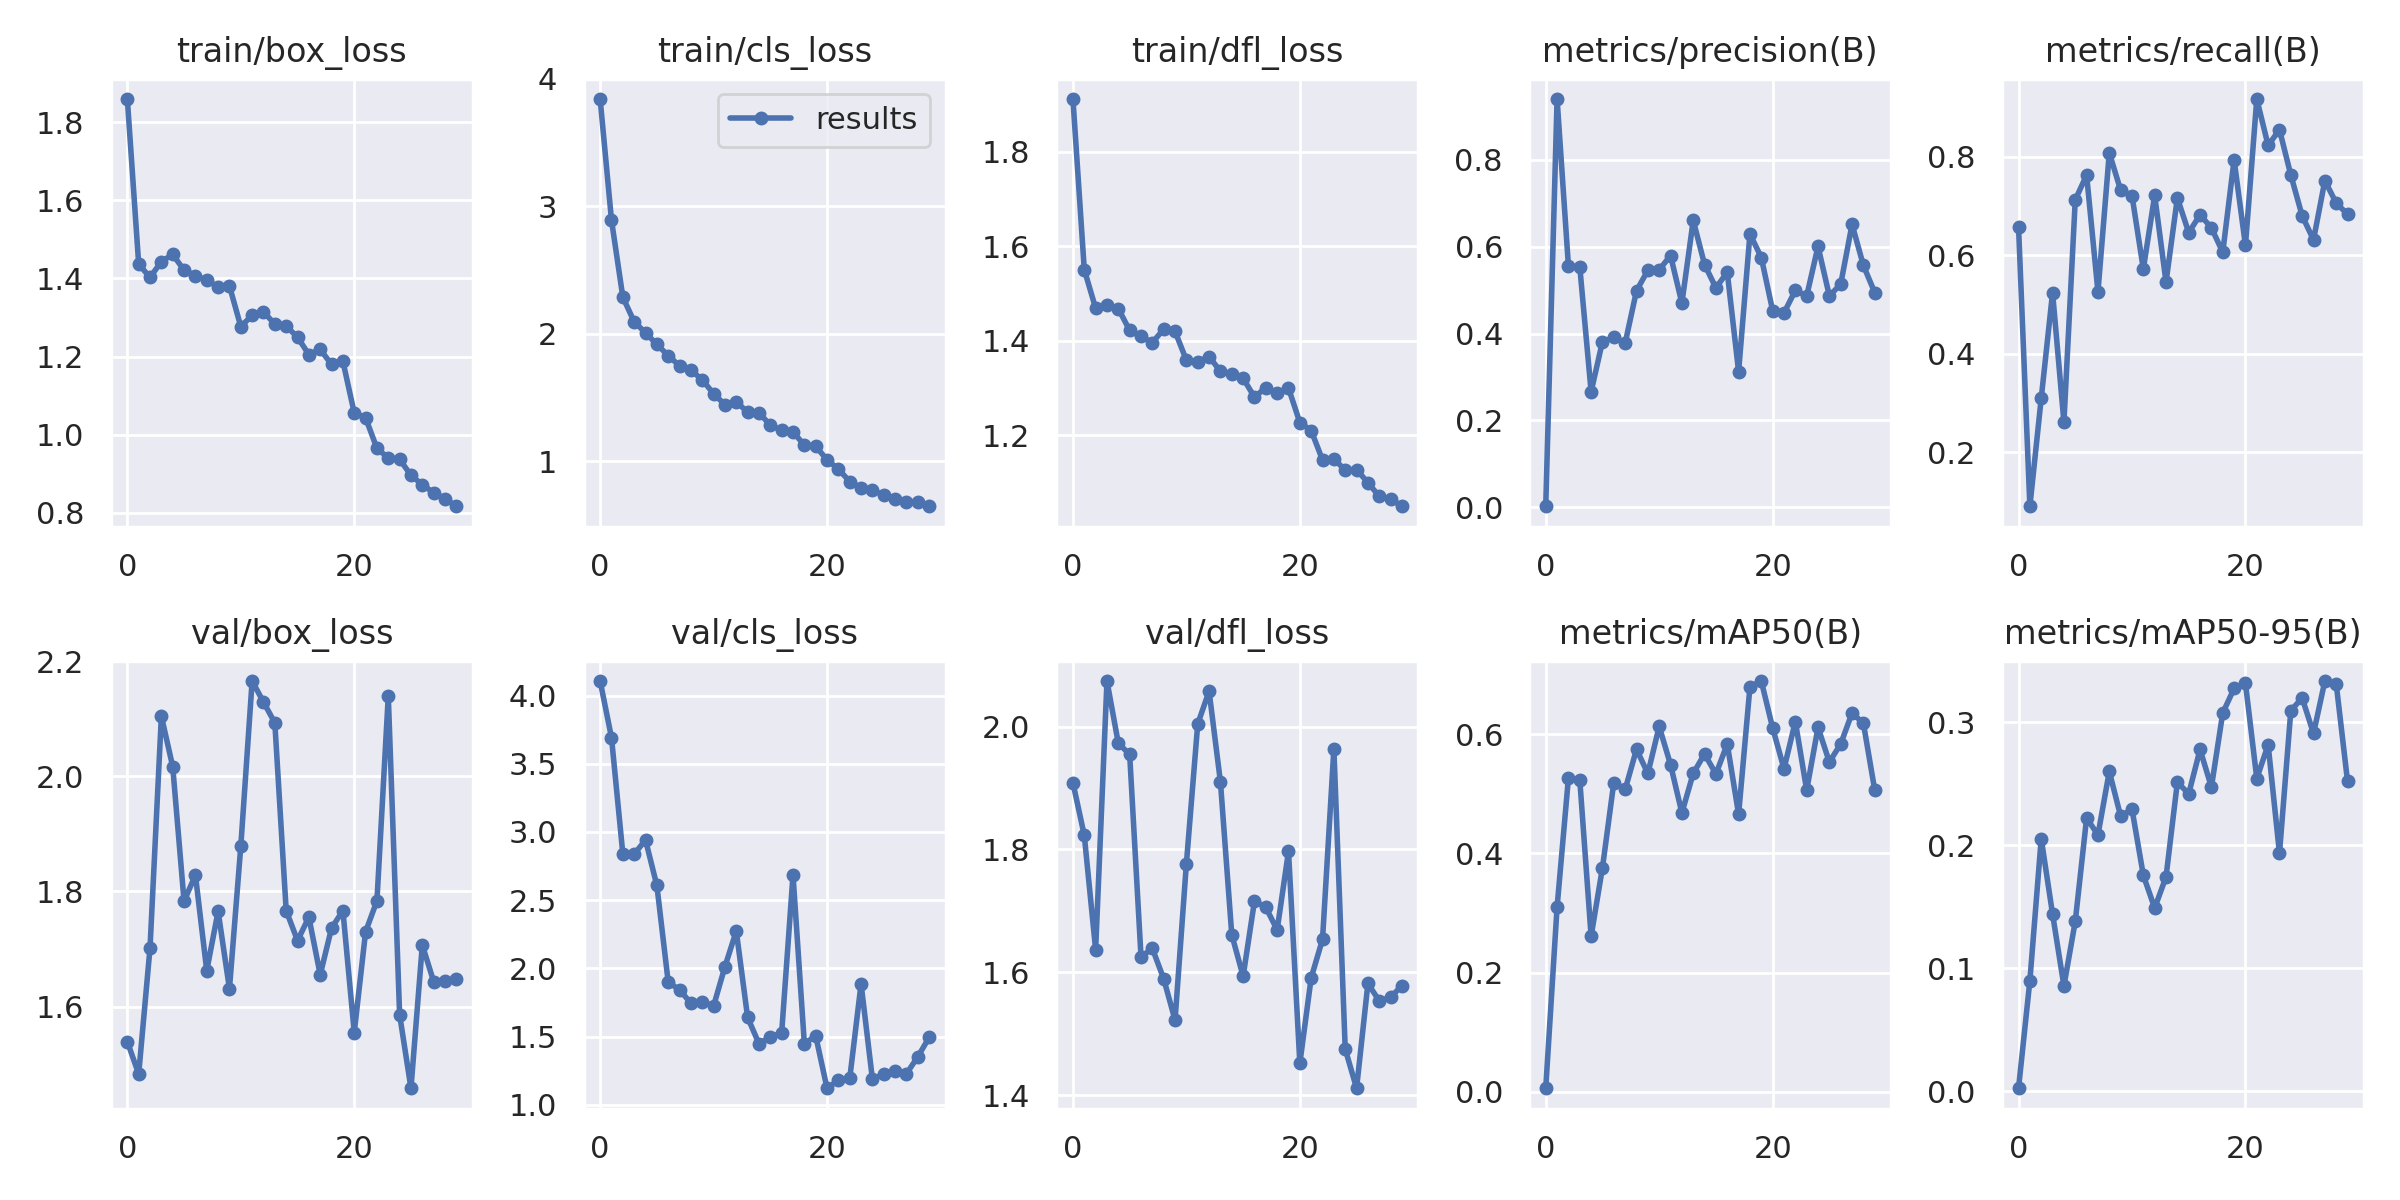

In [ ]:
# visulize the training results: plots
Image(filename=f'{gdrive_root}/{model_type}/runs/detect/train/results.png', width=600)

Fig.3 Loss and Evaluation Metrics Plot

In this figure, it shows the YOLOv8 model prediction on the brain tumor dataset. We can see from the last two plots (metrics/mAP50 & metrics/mAP50-95) that the model did a pretty good job of having increased trends, while the other loss plots have decreased trends.

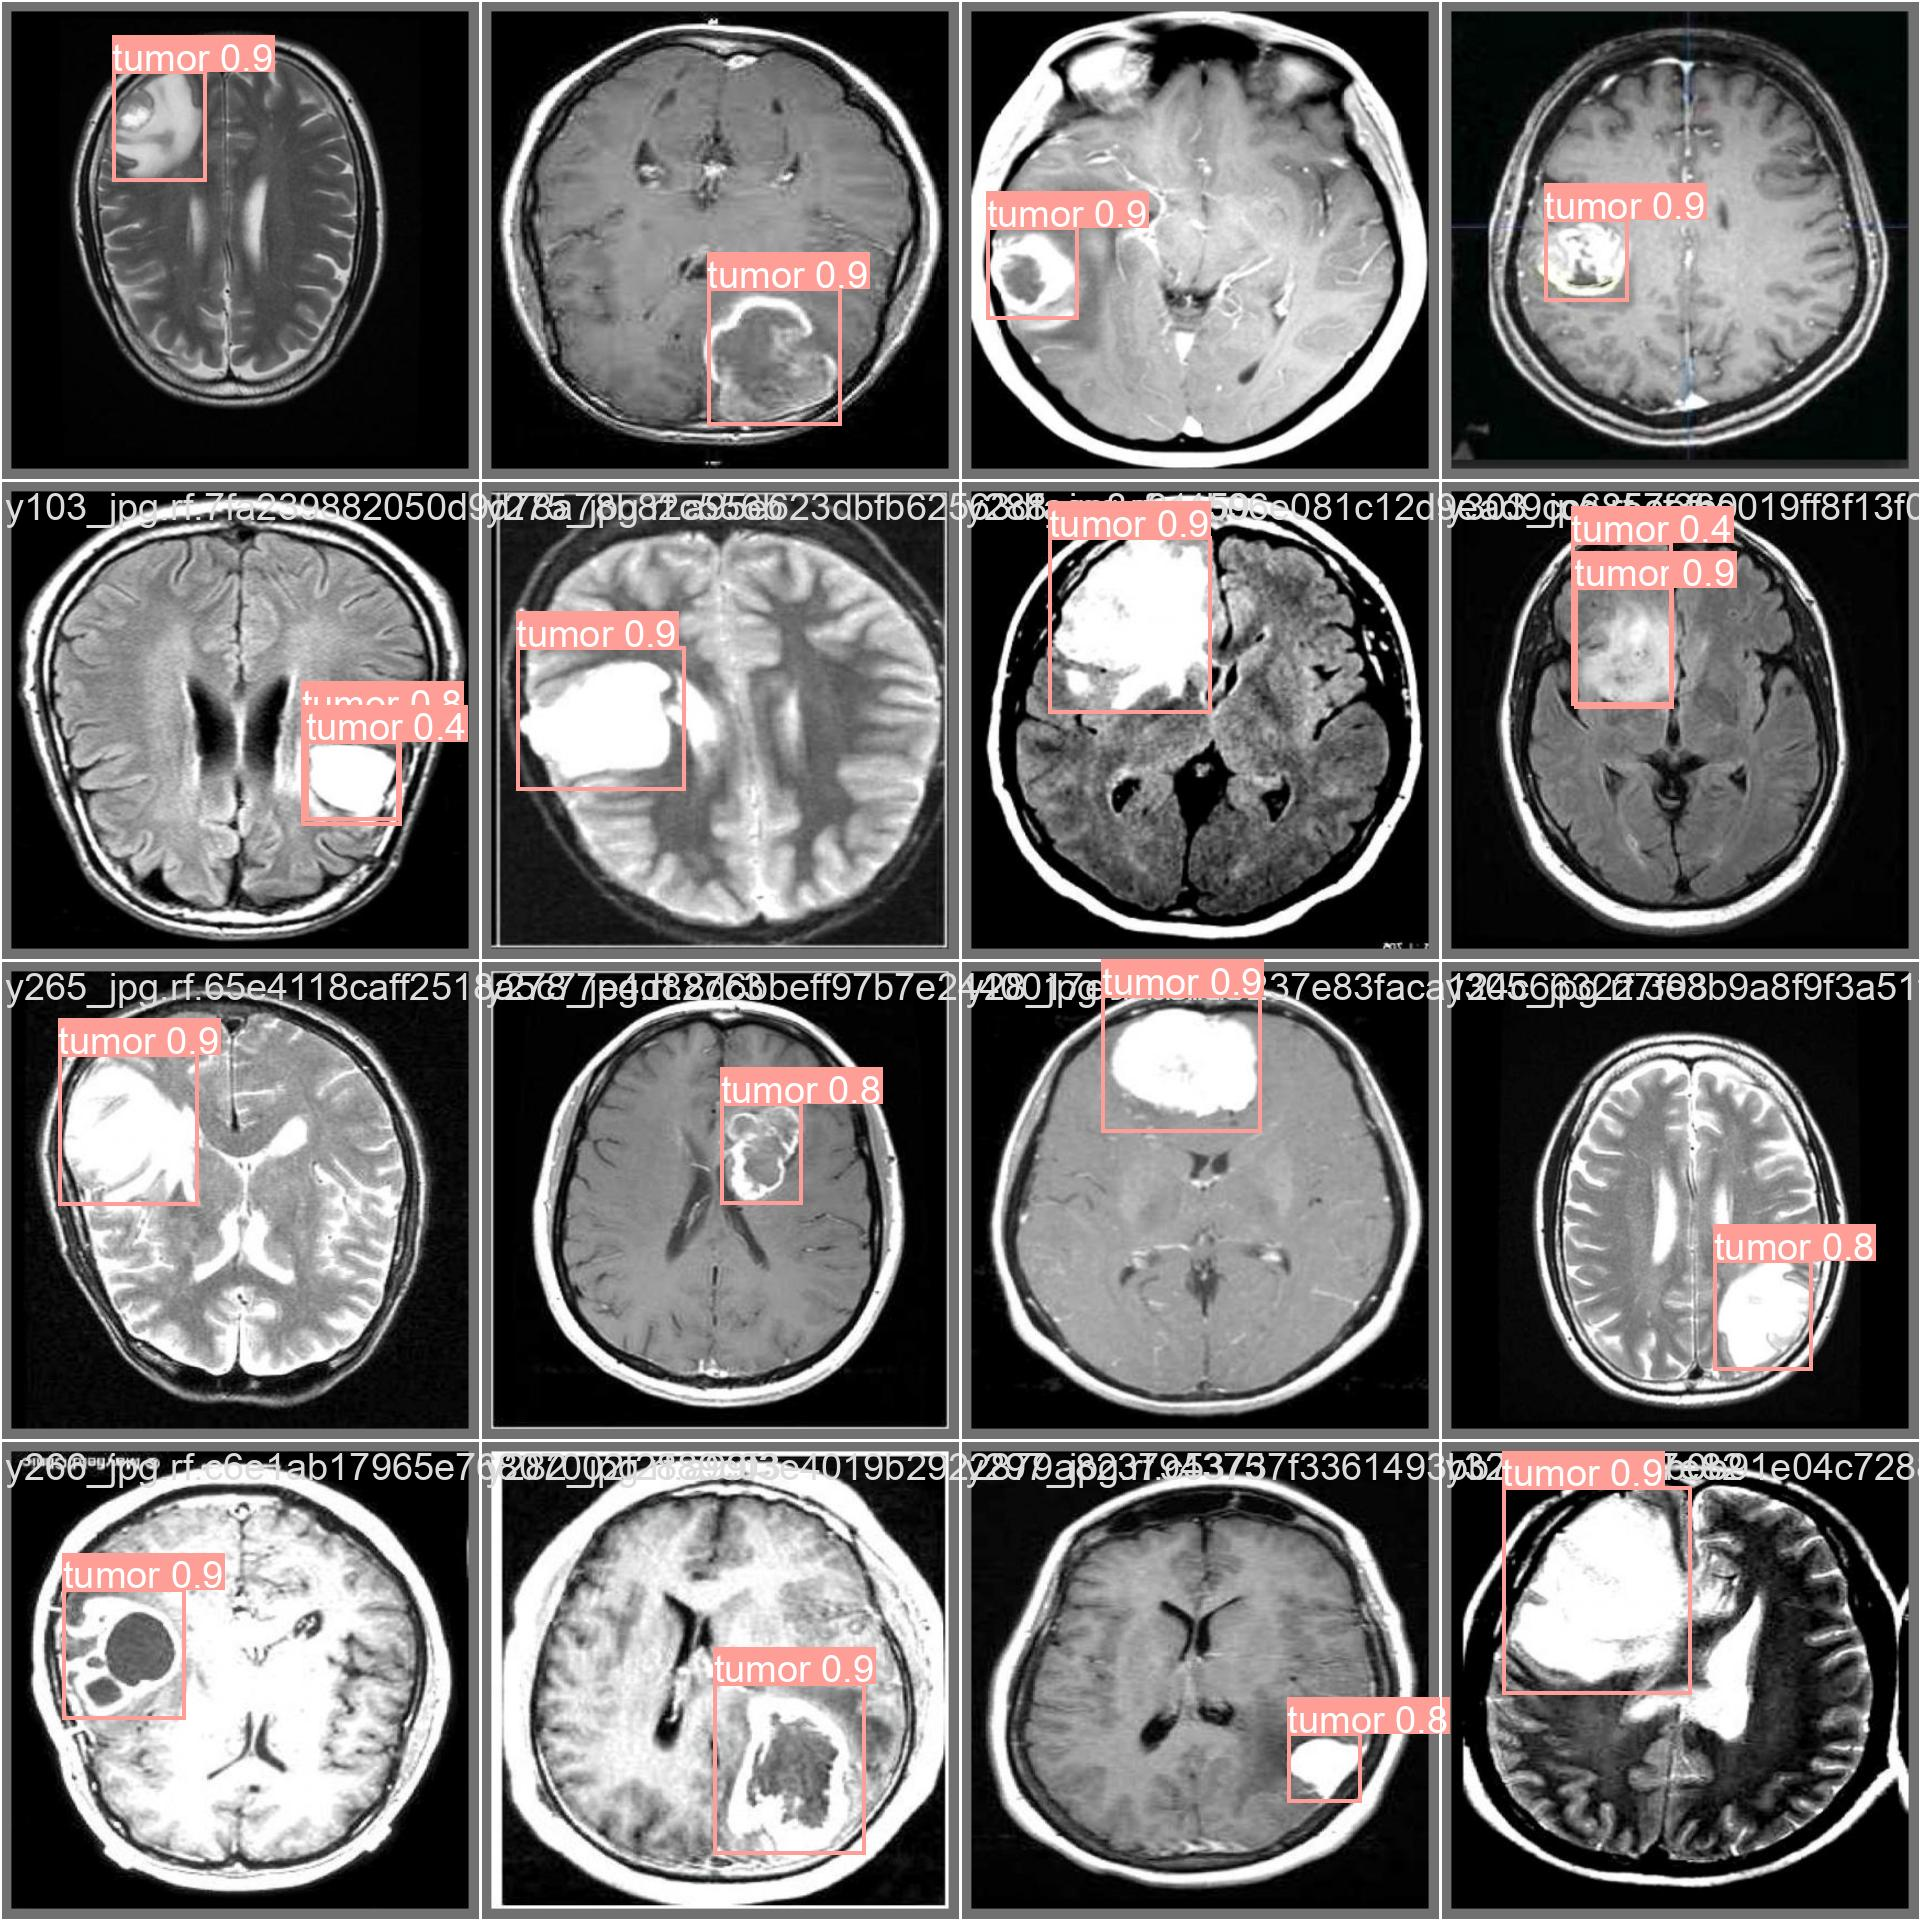

In [ ]:
# visulize the training results: images
Image(filename=f'{gdrive_root}/{model_type}/runs/detect/train/val_batch0_pred.jpg', width=600)

Fig.4 Model prediction on brain tumor validation dataset.

In this figure, the model achieved competitive results for detecting the tumor. We can see that the accuracy are around 0.8-0.9 for every image, and there are no false detection.

In [ ]:
# Validate custom model
%cd {gdrive_root}/{model_type}

!yolo task=detect mode=val model={gdrive_root}/{model_type}/runs/detect/train/weights/best.pt data={gdrive_root}/dataset/data.yaml

/content/drive/MyDrive/demo_braintumor_yolov8/v8n
2023-11-25 23:17:12.364623: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-25 23:17:12.364681: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-25 23:17:12.364718: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-25 23:17:13.507897: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content

In [ ]:
# test model and save the results
%cd {gdrive_root}/{model_type}
!yolo task=detect mode=predict model={gdrive_root}/{model_type}/runs/detect/train/weights/best.pt source={gdrive_root}/dataset/test/images save=True

from IPython import display
display.clear_output()
print('test result saved.')

test result saved.


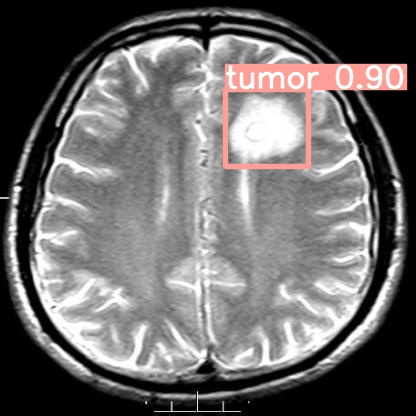

In [ ]:
# visualize one of the test results from the prediction
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{gdrive_root}/{model_type}/runs/detect/predict/*.jpg')[7:8]:
      display(Image(filename=image_path, width=300))
      print("\n")

Fig.5 Prediction of test data for YOLOv8n model

In order to test the result of the model, we visualized one of the images in the test set. The images had a competitive 0.9 accuracy on tumor detection.

We also looked into the other results in the test dataset and discovered that the model did not miss any detection or cause any false detection. Therefore, we can indicate that the YOLOv8n brain tumor detection model did a brilliant job.

### Train (30 epochs) YOLOv8s Model & Evaluate the Model on Test Dataset

In [ ]:
model_type = 'v8s'

In [ ]:
# train model for 30 epochs
%cd {gdrive_root}/{model_type}
!yolo task=detect mode=train model=yolov8s.pt data={gdrive_root}/dataset/data.yaml epochs=30 plots=True

/content/drive/MyDrive/demo_braintumor_yolov8/v8s
100% 21.5M/21.5M [00:00<00:00, 169MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/drive/MyDrive/demo_braintumor_yolov8/dataset/data.yaml, epochs=30, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None

Under the YOLOv8s model training of 30 epochs, the model achieved an mAP (mean Average Precision) of 0.861 at 0.5 IoU for tumor detection, and the 30 epochs were completed in approximately 9.12 minutes (0.152 hours).

In [ ]:
# Validate custom model
%cd {gdrive_root}/{model_type}

!yolo task=detect mode=val model={gdrive_root}/{model_type}/runs/detect/train/weights/best.pt data={gdrive_root}/dataset/data.yaml

/content/drive/MyDrive/demo_braintumor_yolov8/v8s
2023-11-26 01:09:08.308763: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-26 01:09:08.308839: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-26 01:09:08.308893: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-26 01:09:09.496809: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CPU
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
100% 755k/755k [00:00<00:00, 86.0MB/s]
val: 

In [ ]:
# test model and save the results
%cd {gdrive_root}/{model_type}
!yolo task=detect mode=predict model={gdrive_root}/{model_type}/runs/detect/train/weights/best.pt source={gdrive_root}/dataset/test/images save=True

from IPython import display
display.clear_output()
print('test result saved.')

test result saved.


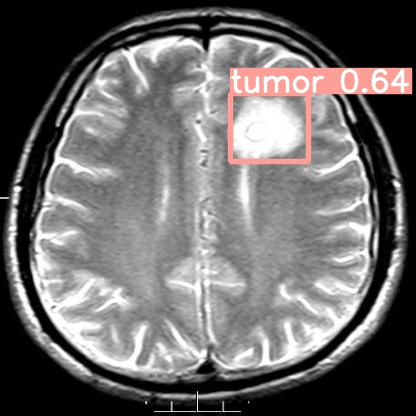

In [ ]:
# visualize one of the test results from the prediction
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{gdrive_root}/{model_type}/runs/detect/predict/*.jpg')[7:8]:
      display(Image(filename=image_path, width=300))
      print("\n")

Fig.6 Prediction of test data for YOLOv8s model

The figure showed one of the images in the test set. The result had a competitive 0.64 accuracy on tumor detection. We also checked that the model did not miss any detection or cause any false detection.

### Train (30 epochs) YOLOv8m Model & Evaluate the Model on Test Dataset

In [ ]:
model_type = 'v8m'

In [ ]:
# train model for 30 epochs
%cd {gdrive_root}/{model_type}
!yolo task=detect mode=train model=yolov8m.pt data={gdrive_root}/dataset/data.yaml epochs=30 plots=True

/content/drive/.shortcut-targets-by-id/1WZkiG5-Cyo8H0cTJiXHmnsuM5G1Bx0_6/demo_braintumor_yolov8/v8m
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8m.yaml, data=/content/drive/MyDrive/demo_braintumor_yolov8/dataset/data.yaml, epochs=30, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, cla

Under the YOLOv8m model training of 30 epochs, the model achieved an mAP (mean Average Precision) of 0.836 at 0.5 IoU for tumor detection, and the 30 epochs were completed in approximately 11.76 minutes (0.196 hours).

In [ ]:
# Validate custom model
%cd {gdrive_root}/{model_type}

!yolo task=detect mode=val model={gdrive_root}/{model_type}/runs/detect/train/weights/best.pt data={gdrive_root}/dataset/data.yaml

/content/drive/.shortcut-targets-by-id/1WZkiG5-Cyo8H0cTJiXHmnsuM5G1Bx0_6/demo_braintumor_yolov8/v8m
2023-11-26 15:36:59.617216: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-26 15:36:59.617267: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-26 15:36:59.617309: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-26 15:37:00.634368: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840918 paramet

In [ ]:
# test model and save the results
%cd {gdrive_root}/{model_type}
!yolo task=detect mode=predict model={gdrive_root}/{model_type}/runs/detect/train/weights/best.pt source={gdrive_root}/dataset/test/images save=True

from IPython import display
display.clear_output()
print('test result saved.')

test result saved.


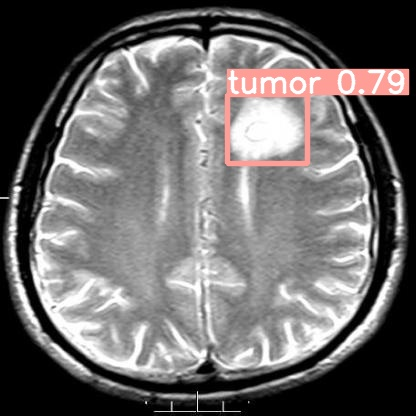

In [ ]:
# visualize one of the test results from the prediction
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{gdrive_root}/{model_type}/runs/detect/predict/*.jpg')[7:8]:
      display(Image(filename=image_path, width=300))
      print("\n")

Fig.7 Prediction of test data for YOLOv8m model

The figure showed one of the images in the test set. The result had a competitive 0.79 accuracy on tumor detection. We also checked that the model did not miss any detection or cause any false detection.

### Train (30 epochs) YOLOv8l Model & Evaluate the Model on Test Dataset

In [ ]:
model_type = 'v8l'

In [ ]:
# train model for 30 epochs
%cd {gdrive_root}/{model_type}
!yolo task=detect mode=train model=yolov8l.pt data={gdrive_root}/dataset/data.yaml epochs=30 plots=True

/content/drive/.shortcut-targets-by-id/1WZkiG5-Cyo8H0cTJiXHmnsuM5G1Bx0_6/demo_braintumor_yolov8/v8l
100% 83.7M/83.7M [00:00<00:00, 163MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8l.yaml, data=/content/drive/MyDrive/demo_braintumor_yolov8/dataset/data.yaml, epochs=30, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=Fals

Under the YOLOv8l model training of 30 epochs, the model achieved an mAP (mean Average Precision) of 0.846 at 0.5 IoU for tumor detection, and the 30 epochs were completed in approximately 14.7 minutes (0.245 hours).

In [ ]:
# Validate custom model
%cd {gdrive_root}/{model_type}

!yolo task=detect mode=val model={gdrive_root}/{model_type}/runs/detect/train/weights/best.pt data={gdrive_root}/dataset/data.yaml

/content/drive/.shortcut-targets-by-id/1WZkiG5-Cyo8H0cTJiXHmnsuM5G1Bx0_6/demo_braintumor_yolov8/v8l
2023-11-26 15:55:10.803519: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-26 15:55:10.803576: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-26 15:55:10.803611: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-26 15:55:11.823407: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43608150 paramet

In [ ]:
# test model and save the results
%cd {gdrive_root}/{model_type}
!yolo task=detect mode=predict model={gdrive_root}/{model_type}/runs/detect/train/weights/best.pt source={gdrive_root}/dataset/test/images save=True

from IPython import display
display.clear_output()
print('test result saved.')

test result saved.


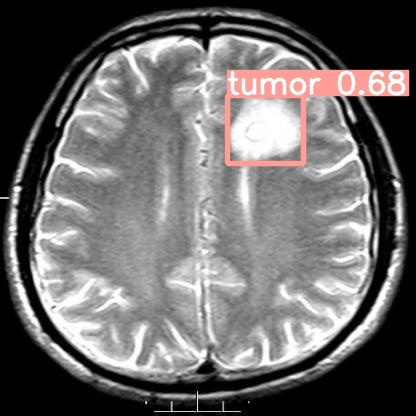

In [ ]:
# visualize one of the test results from the prediction
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{gdrive_root}/{model_type}/runs/detect/predict/*.jpg')[7:8]:
      display(Image(filename=image_path, width=300))
      print("\n")

Fig.8 Prediction of test data for YOLOv8l model

The figure showed one of the images in the test set. The result had a competitive 0.68 accuracy on tumor detection. We also checked that the model did not miss any detection or cause any false detection.

### Train (30 epochs) YOLOv8x Model & Evaluate the Model on Test Dataset

In [ ]:
model_type = 'v8x'

In [ ]:
# train model for 30 epochs
%cd {gdrive_root}/{model_type}
!yolo task=detect mode=train model=yolov8x.pt data={gdrive_root}/dataset/data.yaml epochs=30 plots=True

/content/drive/.shortcut-targets-by-id/1WZkiG5-Cyo8H0cTJiXHmnsuM5G1Bx0_6/demo_braintumor_yolov8/v8x
100% 131M/131M [00:00<00:00, 176MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8x.yaml, data=/content/drive/MyDrive/demo_braintumor_yolov8/dataset/data.yaml, epochs=30, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False,

Under the YOLOv8x model training of 30 epochs, the model achieved an mAP (mean Average Precision) of 0.82 at 0.5 IoU for tumor detection, and the 30 epochs were completed in approximately 19.98 minutes (0.333 hours).

In [ ]:
# Validate custom model
%cd {gdrive_root}/{model_type}

!yolo task=detect mode=val model={gdrive_root}/{model_type}/runs/detect/train/weights/best.pt data={gdrive_root}/dataset/data.yaml

/content/drive/.shortcut-targets-by-id/1WZkiG5-Cyo8H0cTJiXHmnsuM5G1Bx0_6/demo_braintumor_yolov8/v8x
2023-11-26 16:17:45.296472: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-26 16:17:45.296530: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-26 16:17:45.296567: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-26 16:17:46.520082: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 68125494 paramet

In [ ]:
# test model and save the results
%cd {gdrive_root}/{model_type}
!yolo task=detect mode=predict model={gdrive_root}/{model_type}/runs/detect/train/weights/best.pt source={gdrive_root}/dataset/test/images save=True

from IPython import display
display.clear_output()
print('test result saved.')

test result saved.


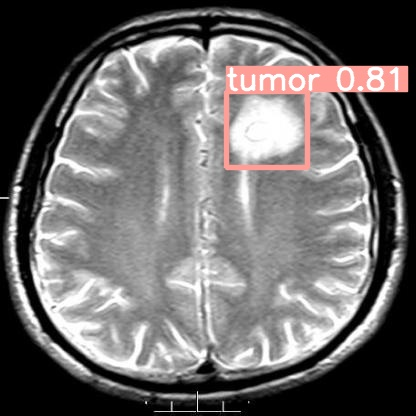

In [ ]:
# visualize two of the test results from the prediction
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{gdrive_root}/{model_type}/runs/detect/predict/*.jpg')[7:8]:
      display(Image(filename=image_path, width=300))
      print("\n")

Fig.9 Prediction of test data for YOLOv8x model

The figure showed one of the images in the test set. The result had a competitive 0.81 accuracy on tumor detection. We also checked that the model did not miss any detection or cause any false detection.

### Conclusion

Text(0.5, 1.0, 'YOLOv8x')

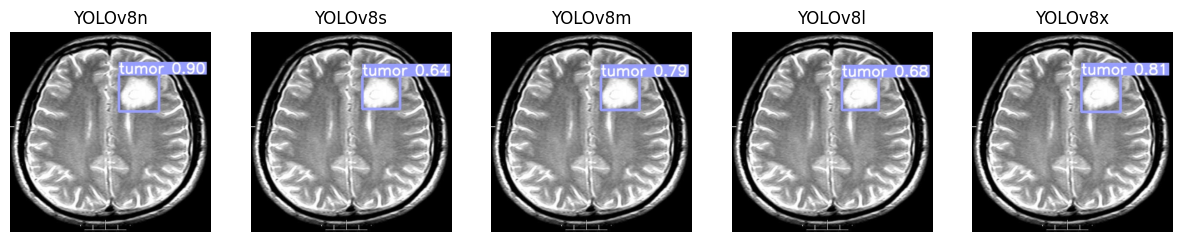

In [ ]:
#import libraries
import cv2
from matplotlib import pyplot as plt

# create figure
fig = plt.figure(figsize=(15, 15))

# setting values to rows and column variables
rows = 1
columns = 5

# read images
test_v8n = cv2.imread(f'{gdrive_root}/v8n/runs/detect/predict/y325_jpg.rf.cb75a8b8b410582749c8df7409cb58b3.jpg')
test_v8s = cv2.imread(f'{gdrive_root}/v8s/runs/detect/predict/y325_jpg.rf.cb75a8b8b410582749c8df7409cb58b3.jpg')
test_v8m = cv2.imread(f'{gdrive_root}/v8m/runs/detect/predict/y325_jpg.rf.cb75a8b8b410582749c8df7409cb58b3.jpg')
test_v8l = cv2.imread(f'{gdrive_root}/v8l/runs/detect/predict/y325_jpg.rf.cb75a8b8b410582749c8df7409cb58b3.jpg')
test_v8x = cv2.imread(f'{gdrive_root}/v8x/runs/detect/predict/y325_jpg.rf.cb75a8b8b410582749c8df7409cb58b3.jpg')

# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
plt.imshow(test_v8n)
plt.axis('off')
plt.title("YOLOv8n")

# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
plt.imshow(test_v8s)
plt.axis('off')
plt.title("YOLOv8s")

# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 3)
plt.imshow(test_v8m)
plt.axis('off')
plt.title("YOLOv8m")

# Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 4)
plt.imshow(test_v8l)
plt.axis('off')
plt.title("YOLOv8l")

# Adds a subplot at the 5th position
fig.add_subplot(rows, columns, 5)
plt.imshow(test_v8x)
plt.axis('off')
plt.title("YOLOv8x")



Fig.10 Predictions of test data for all YOLOv8 model

The tumor detection of mAP (mean Average Precision) at 0.5 IoU and training time for 30 epochs :

Model Types        | mAP50 Accuracy | Training Time (hours) | Testing Accuracy
-------------------|-------------------|------------------|------------------
YOLOv8n            | 0.861             | 0.141             | 0.9      
YOLOv8s            | 0.861             | 0.152             | 0.64    
YOLOv8m            | 0.836             | 0.196             | 0.79
YOLOv8l            | 0.846             | 0.245             | 0.68   
YOLOv8x            | 0.82              | 0.333             | 0.81    

Table.1 The comparison of 5 YOLOv8 models

From the comparison table above, we can discover that for this brain tumor dataset, YOLOv8n is the fastest model with the most accurate result. YOLOv8x also turned out to have a competitive accuracy but it is the slowest among the other YOLOv8 models. We also visualize the YOLOv8n's training results (fig.2~4) in the above YOLOv8n section. If we want further enhancement of the accuracy, we could try a higher epoch under a better environment or apply image segmentation methods to cut the ROI of the image.

As a result, the experiment indicated that we have achieved a pretty good result with the YOLOv8n model which means that the YOLOv8 model can actually be a very helpful tool in medical images for detection and analysis of anomalies or specific objects in medical scans.